# Pré-Processamento 2

Faz análises mais profundas para selecionar as colunas mais relevantes, etc.

In [56]:
#@title Configurações iniciais
import pandas as pd
import numpy as np
from ipywidgets import interact

import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact

BASE_PATH = 'dados/'

In [57]:
df = pd.read_excel(BASE_PATH + 'full-preproc1.xlsx')
df.head()

,ID,Candidato,DiaDaSemana,DiasDecorridos,Duracao,Retórica Aristotélica,Dispositivo Retórico,Tipo de conteúdo,Abordagem,Tonalidade,Main character,Texto / Hashtag,Plays,Curtidas,Comentarios,Compart.
0,7114971700365692165,Bolsonaro,Friday,94,57.93,Pathos,Political Statement,Campaign Act,Acclamation,Neutral,Self alone,Hashtag,248400.0,24400,1083,1566
1,7115050482179050758,Bolsonaro,Friday,94,17.13,Logos,Fact/Statistic,Political-Purposeful,Acclamation,Positive,Self alone,Hashtag,82000.0,9163,480,1140
2,7115120078982630661,Bolsonaro,Friday,94,52.54,Ethos,Commitment,Political-Purposeful,Acclamation,Positive,Self + voters,Hashtag,42300.0,3485,198,355
3,7115161088219565317,Bolsonaro,Friday,94,34.48,Nenhum,Humor,Personal,Acclamation,Positive,Self alone,Hashtag,168500.0,22100,666,967
4,7115207919750253830,Bolsonaro,Friday,94,66.66,Logos,Fact/Statistic,Political-Purposeful,Attack,Negative,Self alone,Hashtag,1800000.0,115700,5390,53800


In [58]:
filter_lula      = (df['Candidato'] == 'Lula')
filter_bolsonaro = (df['Candidato'] == 'Bolsonaro')

# 1 - Atributos Alvos (Várias Opções)

## 1.1 - Correlações

Correlações entre as colunas de saída na escala **normal**:

In [59]:
df[['Plays', 'Curtidas', 'Comentarios', 'Compart.']].corr()

,Plays,Curtidas,Comentarios,Compart.
Plays,1.000000,0.939376,0.882783,0.799603
Curtidas,0.939376,1.000000,0.903739,0.654775
Comentarios,0.882783,0.903739,1.000000,0.690303
Compart.,0.799603,0.654775,0.690303,1.000000


Correlações na escala **logarítmica**:

In [60]:
np.log(df[['Plays', 'Curtidas', 'Comentarios', 'Compart.']]).corr()

c:\ProgramData\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,Plays,Curtidas,Comentarios,Compart.
Plays,1.000000,0.975363,0.933261,0.832394
Curtidas,0.975363,1.000000,0.939857,0.833170
Comentarios,0.933261,0.939857,1.000000,0.848889
Compart.,0.832394,0.833170,0.848889,1.000000


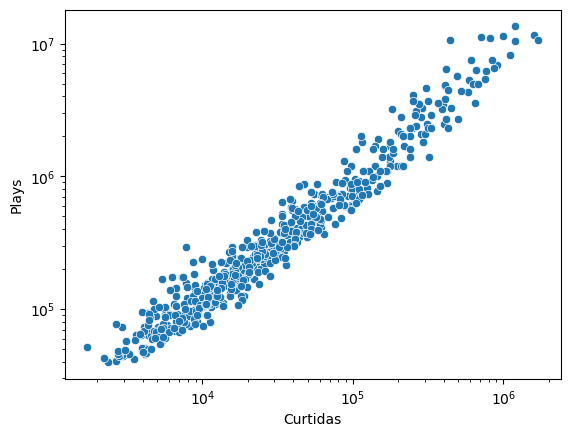

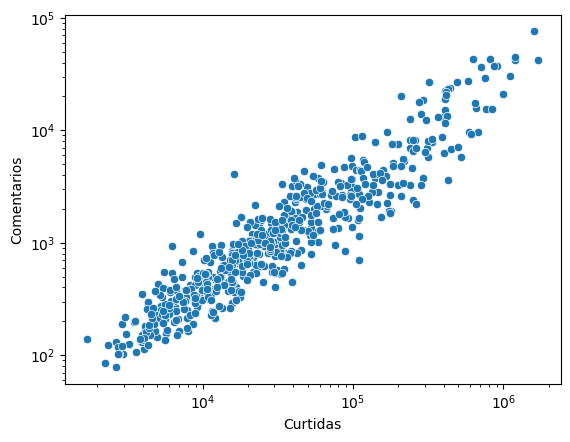

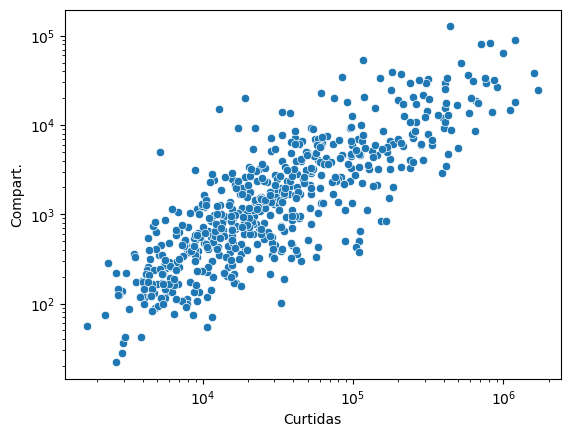

In [61]:
# scatter plots de Curtidas x cada uma das demais colunas
# na escala logarítmica
for col in ['Plays', 'Comentarios', 'Compart.']:
    sns.scatterplot(data=df, x='Curtidas', y=col)
    plt.xscale('log')
    plt.yscale('log')
    plt.show()

**Decisão**: Usar *curtidas* como base para os atributos alvos. (Os demais são correlacionados às curtidas).

## 1.2 - Transformações do Atributo Alvo Contínuo

In [62]:
df['Curtidas-Log'] = np.log10(df['Curtidas'])

In [63]:
df_lula = df[filter_lula]
df_bolsonaro = df[filter_bolsonaro]

# a forma mais correta de atribuir valores a um DataFrame de forma seletiva é com loc
df.loc[filter_lula, 'Curtidas-MinMax'] = (df_lula['Curtidas'] - df_lula['Curtidas'].min()) / (df_lula['Curtidas'].max() - df_lula['Curtidas'].min())
df.loc[filter_bolsonaro, 'Curtidas-MinMax'] = (df_bolsonaro['Curtidas'] - df_bolsonaro['Curtidas'].min()) / (df_bolsonaro['Curtidas'].max() - df_bolsonaro['Curtidas'].min())

In [64]:
df.loc[filter_lula, 'Curtidas-Log-MinMax'] = (df_lula['Curtidas-Log'] - df_lula['Curtidas-Log'].min()) / (df_lula['Curtidas-Log'].max() - df_lula['Curtidas-Log'].min())
df.loc[filter_bolsonaro, 'Curtidas-Log-MinMax'] = (df_bolsonaro['Curtidas-Log'] - df_bolsonaro['Curtidas-Log'].min()) / (df_bolsonaro['Curtidas-Log'].max() - df_bolsonaro['Curtidas-Log'].min())

In [65]:
df[['Curtidas','Curtidas-Log', 'Curtidas-MinMax', 'Curtidas-Log-MinMax']].describe()

,Curtidas,Curtidas-Log,Curtidas-MinMax,Curtidas-Log-MinMax
count,5.690000e+02,569.000000,569.000000,569.000000
mean,9.065289e+04,4.475821,0.062374,0.412547
std,1.885823e+05,0.610666,0.129552,0.212791
min,1.712000e+03,3.233504,0.000000,0.000000
25%,1.050000e+04,4.021189,0.005469,0.255047
50%,2.450000e+04,4.389166,0.016225,0.382231
75%,7.220000e+04,4.858537,0.047099,0.544421
max,1.700000e+06,6.230449,1.000000,1.000000


In [66]:
NUMERICAL_OUTPUTS = ['Curtidas','Curtidas-Log', 'Curtidas-MinMax', 'Curtidas-Log-MinMax']

## 1.3 - Distribuição dos Atributos Alvos Contínuos

In [67]:
# precisa atribuir novamente, para ter acesso às novas colunas
df_lula = df[filter_lula]
df_bolsonaro = df[filter_bolsonaro]

In [68]:
def show_histogram(column):
    # histogram of the target variable
    plt.figure(figsize=(12, 5))
    sns.histplot(df[column], kde=True, cumulative=False)
    plt.title(f'Histograma da variável {col}')
    plt.show()

interact(show_histogram, column=NUMERICAL_OUTPUTS);

interactive(children=(Dropdown(description='column', options=('Curtidas', 'Curtidas-Log', 'Curtidas-MinMax', '…

Gráficos por candidato:

In [69]:
def show_histograms_for_candidates(column):
    # Plotar os histogramas separados
    plt.figure(figsize=(14, 5))

    x_limits = (min(df_lula[column].min(), df_bolsonaro[column].min()),
                max(df_lula[column].max(), df_bolsonaro[column].max()))
    y_limits = (0.0, 70) # detectada por inspeção visual mesmo

    plt.subplot(1, 2, 1)  # Subplot for Lula
    sns.histplot(data=df_lula, x=column, kde=True, stat='percent', color='blue')
    plt.xlabel('Valor')
    plt.ylabel('Proporção (%)')
    plt.title(f'Histograma de {column} para Lula')
    plt.xlim(x_limits)
    plt.ylim(y_limits)

    plt.subplot(1, 2, 2)  # Subplot for Bolsonaro
    sns.histplot(data=df_bolsonaro, x=column, kde=True, stat='percent', color='green')
    plt.xlabel('Valor')
    plt.ylabel('Proporção (%)')
    plt.title(f'Histograma de {column} para Bolsonaro')
    plt.xlim(x_limits)
    plt.ylim(y_limits)

    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()

interact(show_histograms_for_candidates, column=NUMERICAL_OUTPUTS);

interactive(children=(Dropdown(description='column', options=('Curtidas', 'Curtidas-Log', 'Curtidas-MinMax', '…

## 1.4 - Criando Atributos Alvos Categóricos

Criando atributos alvos categóricos, para aplicar algoritmos de classificação.

**Divisão pelo 75-percentil**

In [70]:
df.groupby('Candidato')['Curtidas'].describe()

,count,mean,std,min,25%,50%,75%,max
Candidato,,,,,,,,
Bolsonaro,261.0,92531.858238,163962.486952,2368.0,14300.00,31500.0,92600.0,1200000.0
Lula,308.0,89060.652597,207423.147357,1712.0,8804.25,19400.0,60200.0,1700000.0


In [71]:
df.loc[filter_bolsonaro, 'Curtidas-2Classes-75p'] = df_bolsonaro['Curtidas'] > 92_600
df[filter_bolsonaro]['Curtidas-2Classes-75p'].value_counts() / df_bolsonaro.shape[0]

Curtidas-2Classes-75p
False    0.750958
True     0.249042
Name: count, dtype: float64

In [72]:
df.loc[filter_lula, 'Curtidas-2Classes-75p'] = df_lula['Curtidas'] > 60_200
df[filter_lula]['Curtidas-2Classes-75p'].value_counts() / df_lula.shape[0]

Curtidas-2Classes-75p
False    0.75
True     0.25
Name: count, dtype: float64

In [73]:
df['Curtidas-2Classes-75p'] = df['Curtidas-2Classes-75p'].astype(int)

In [74]:
df['Curtidas-2Classes-75p'].value_counts() / df.shape[0]

Curtidas-2Classes-75p
0    0.750439
1    0.249561
Name: count, dtype: float64

**Divisão pela Mediana (50-percentil)**

In [75]:
df.loc[filter_bolsonaro, 'Curtidas-2Classes-50p'] = df_bolsonaro['Curtidas'] > 31_600
df[filter_bolsonaro]['Curtidas-2Classes-50p'].value_counts() / df_bolsonaro.shape[0]


Curtidas-2Classes-50p
False    0.501916
True     0.498084
Name: count, dtype: float64

In [76]:
df.loc[filter_lula, 'Curtidas-2Classes-50p'] = df_lula['Curtidas'] > 19_400
df[filter_lula]['Curtidas-2Classes-50p'].value_counts() / df_lula.shape[0]

Curtidas-2Classes-50p
False    0.5
True     0.5
Name: count, dtype: float64

In [77]:
df['Curtidas-2Classes-50p'] = df['Curtidas-2Classes-50p'].astype(int)

In [78]:
df['Curtidas-2Classes-50p'].value_counts()

Curtidas-2Classes-50p
0    285
1    284
Name: count, dtype: int64

In [79]:
CATEGORICAL_OUTPUTS = ['Curtidas-2Classes-75p', 'Curtidas-2Classes-50p']

# 2 - Atributos de Entrada Categóricos

In [80]:
INPUT_CATEGORICAL_COLS = ['Candidato', 'DiaDaSemana', 'Retórica Aristotélica', 'Dispositivo Retórico', 'Tipo de conteúdo', 
              'Abordagem', 'Tonalidade', 'Main character', 'Texto / Hashtag']

### 2.1 - Visualização dos dados

In [81]:
# usar piwidget para selecionar a coluna
# e, depois, mostrar um histograma dos valores da coluna
# mostrar os labels dos valores inclinados de 90 graus
def show_values_histogram(column):
    plt.title("Distribuição entre as valores (classes) da variável")
    sns.histplot(df[column], bins=20)
    plt.xticks(rotation=90)
    plt.show()

interact(show_values_histogram, column=df.columns[1:])

interactive(children=(Dropdown(description='column', options=('Candidato', 'DiaDaSemana', 'DiasDecorridos', 'D…

<function __main__.show_values_histogram(column)>

In [82]:
import scipy.stats as stats

from IPython.display import display, Markdown

In [83]:
# usar piwidget para selecionar a coluna
# e, depois, mostrar um histograma das distribuições dos likes
# para cada valor distinto da coluna
def show_likes_distribution_per_value(column, log_scale):
    display(Markdown(f'## Distribuição dos likes para o atributo "{column}"'))
    curtidas_log = np.log(df['Curtidas'])
    if log_scale:
        min_likes, max_likes = curtidas_log.min(), curtidas_log.max()
    else:
        min_likes, max_likes = df['Curtidas'].min(), df['Curtidas'].max()
    for value in df[column].unique():
        if log_scale:
            likes_in_group = curtidas_log[df[column] == value]
        else:
            likes_in_group = df[df[column] == value]['Curtidas']
        sns.histplot(likes_in_group, bins=20, stat='probability', kde=True)
        plt.title(f"Distribuição dos likes para {column}={value}")
        if log_scale:
            plt.xlabel('log(Likes)')
        else:
            plt.xlabel("Likes")
        plt.ylabel("Proporção")
        plt.xlim(min_likes, max_likes)
        plt.ylim(0.0, 1.0)
        plt.show()
        if len(likes_in_group) < 3:
            display(Markdown(
                f"**Atenção**: não é possível fazer o teste de Shapiro, por ter poucos exemplos ({len(likes_in_group)}) para {column}={value}"
            ))
        else:
            _, p_value = stats.shapiro(likes_in_group)
            normality_str = "normal" if p_value > 0.05 else "não normal"
            display(Markdown(
                f"**Teste de normalidade de Shapiro** para {column}={value}: p-value={p_value:.4f} ({normality_str})"
            ))

interact(show_likes_distribution_per_value, column=INPUT_CATEGORICAL_COLS, log_scale=False)

interactive(children=(Dropdown(description='column', options=('Candidato', 'DiaDaSemana', 'Retórica Aristotéli…

<function __main__.show_likes_distribution_per_value(column, log_scale)>

### 2.2 - Avaliando relevância das variáveis categóricas

Aqui, fazemos testes para estimar a relevâncias das variáveis de entrada categóricas na previsão da variável alvo.

In [84]:
def tests_per_categories(df, input_col, target_col, use_log_of_target=[False,False]):
    '''
    Função que retorna alguns resultados para estimar se a variável categórica é relevante para prever a variável alvo numérica. 
    Em todos os casos, a estimativa é baseada nos valores de `target_col` quando os dados são filtrados para cada valor de `input_col`. 
    Por enquanto, retorna tupla com dois valores:
    - 0: p-value do teste ANOVA, que indica a probabilidade de ser verdade a hipótese nula de que as médias das amostras (agrupadas para
    cada valor de `input_col`são iguais). Se for significativamente baixo (<=0.05, por exemplo), a hipótese nula pode ser rejeitada.
    - 1: p-value do teste de Kruskal-Wallis, que é uma versão não-paramétrica do teste ANOVA. É mais robusto que o ANOVA quando
    as premissas do ANOVA não são satisfeitas.
    - 2: desvio padrão entre as médias dos valores das amostras para cada valor de `input_col`.
    '''
    groups = df.groupby(input_col)[target_col]
    groups = [group for (name, group) in groups]
    log_groups = None
    if use_log_of_target[0] or use_log_of_target[1]:
        log_groups = [np.log(group) for group in groups]

    # Calculate ANOVA
    if use_log_of_target[0]:
        anova_p_val = stats.f_oneway(*log_groups).pvalue
    else:
        anova_p_val = stats.f_oneway(*groups).pvalue

    # Calculate Kruskal-Wallis
    if use_log_of_target[1]:
        kruskalwallis_p_val = stats.kruskal(*log_groups).pvalue
    else:
        kruskalwallis_p_val = stats.kruskal(*groups).pvalue

    # Calculate standard deviation of means
    std_dev = np.std([group.mean() for group in groups])

    return anova_p_val, kruskalwallis_p_val, std_dev

In [85]:
# creates a dataframe with a colum for the column names and another ones for the values returnde by the tests_per_categories
# calculated with tests_per_categories
def calculate_tests(df, input_cols, target_col, target_log=[False,False]):
    results = []
    for col in input_cols:
        an_p_val, kw_p_val, std_dev = tests_per_categories(df, col, target_col, use_log_of_target=target_log)
        an_p_val = round(an_p_val, 5)
        kw_p_val = round(kw_p_val, 5)
        std_dev = round(std_dev, 5)
        results.append((col, an_p_val, kw_p_val, std_dev))
    return pd.DataFrame(results, columns=['Column Label', 'ANOVA P-value', 'K.W. P-value', 'Std Dev'])

In [86]:
# the ANOVA is calculated with log of the target variable, while the Kruskal-Wallis is calculated without log
df_col_tests = calculate_tests(df, INPUT_CATEGORICAL_COLS, 'Curtidas', target_log=[True,False])
#df_col_tests

In [87]:
# selecionei os quatro melhores deste ranking
# requer distr. normal e com mesma variância, MAS é robusto a desvios (https://en.wikipedia.org/wiki/One-way_analysis_of_variance)
df_col_tests.sort_values('ANOVA P-value')

,Column Label,ANOVA P-value,K.W. P-value,Std Dev
3,Dispositivo Retórico,0.00000,0.00000,59051.51870
4,Tipo de conteúdo,0.00000,0.00000,99708.30175
2,Retórica Aristotélica,0.00004,0.00012,37613.77489
8,Texto / Hashtag,0.00227,0.00153,57125.96970
0,Candidato,0.00275,0.00038,1735.60282
7,Main character,0.00700,0.00209,27080.89807
5,Abordagem,0.20441,0.13001,3487.21424
6,Tonalidade,0.68744,0.71099,4825.45147
1,DiaDaSemana,0.86212,0.76187,7008.18973


In [88]:
df_col_tests.sort_values('K.W. P-value')

,Column Label,ANOVA P-value,K.W. P-value,Std Dev
3,Dispositivo Retórico,0.00000,0.00000,59051.51870
4,Tipo de conteúdo,0.00000,0.00000,99708.30175
2,Retórica Aristotélica,0.00004,0.00012,37613.77489
0,Candidato,0.00275,0.00038,1735.60282
8,Texto / Hashtag,0.00227,0.00153,57125.96970
7,Main character,0.00700,0.00209,27080.89807
5,Abordagem,0.20441,0.13001,3487.21424
6,Tonalidade,0.68744,0.71099,4825.45147
1,DiaDaSemana,0.86212,0.76187,7008.18973


In [89]:
# e os quatro melhores deste ranking
df_col_tests.sort_values('Std Dev', ascending=False)

,Column Label,ANOVA P-value,K.W. P-value,Std Dev
4,Tipo de conteúdo,0.00000,0.00000,99708.30175
3,Dispositivo Retórico,0.00000,0.00000,59051.51870
8,Texto / Hashtag,0.00227,0.00153,57125.96970
2,Retórica Aristotélica,0.00004,0.00012,37613.77489
7,Main character,0.00700,0.00209,27080.89807
1,DiaDaSemana,0.86212,0.76187,7008.18973
6,Tonalidade,0.68744,0.71099,4825.45147
5,Abordagem,0.20441,0.13001,3487.21424
0,Candidato,0.00275,0.00038,1735.60282


#### Post-hoc Analysis

In [90]:
import scikit_posthocs as sp

In [91]:
def kruskal_wallis_posthoc(df, input_col, target_col, alpha=0.05):
    # Perform Kruskal-Wallis test
    groups = [group for name, group in df.groupby(input_col)[target_col]]
    kruskal_stat, p_value = stats.kruskal(*groups)
    
    if p_value < alpha:
        # Conduct pairwise comparisons using Dunn's test
        dunn_results = sp.posthoc_dunn(groups, p_adjust='bonferroni')
        
        # Extract significant comparisons
        significant_comparisons = [(group1, group2) for group1, group2 in zip(*np.where(dunn_results < alpha))]
        
        return kruskal_stat, p_value, significant_comparisons
    else:
        return kruskal_stat, p_value, None


In [92]:
# Example usage:
#kruskal_stat, p_value, significant_comparisons = kruskal_wallis_posthoc(df, 'DiaDaSemana', 'Curtidas')
kruskal_stat, p_value, significant_comparisons = kruskal_wallis_posthoc(df, 'Dispositivo Retórico', 'Curtidas')

print("Kruskal-Wallis Statistic:", kruskal_stat)
print("P-value:", p_value)

if significant_comparisons:
    print("Significant Comparisons:")
    for group1, group2 in significant_comparisons:
        print(f"{group1} vs {group2}")
else:
    print("No significant differences between groups.")

Kruskal-Wallis Statistic: 60.41091938782552
P-value: 1.8995389868115882e-08
Significant Comparisons:
0 vs 6
0 vs 7
3 vs 6
5 vs 6
6 vs 0
6 vs 3
6 vs 5
6 vs 8
6 vs 10
7 vs 0
8 vs 6
10 vs 6


## 2.3 - Transformação da Coluna 'Candidato'

In [93]:
# transforma em one-hot encoding
df = pd.get_dummies(df, columns=['Candidato'], dtype=int)

## 2.4 Escolha dos Atributos

Analisando dois atributos que foram mal em cada um dos testes (e apenas em um deles).

In [94]:
def summarize_likes_grouped_by(column):
    df_aux1 = df.groupby(column)['Curtidas'].agg(['count', 'mean', 'std'])
    df_aux1['coef.var.'] = df_aux1['std'] / df_aux1['mean']
    return df_aux1.sort_values('mean', ascending=False)

In [95]:
summarize_likes_grouped_by("Tonalidade")

,count,mean,std,coef.var.
Tonalidade,,,,
Positive,280,95810.225000,202167.055553,2.110078
Negative,19,94608.736842,156140.990108,1.650387
Neutral,270,85026.174074,176096.205167,2.071082


In [96]:
summarize_likes_grouped_by("Abordagem")

,count,mean,std,coef.var.
Abordagem,,,,
Acclamation,469,91438.149254,198102.968654,2.166524
Attack,72,88504.680556,138192.767551,1.561418
Defense,28,83023.821429,132668.834408,1.597961


In [97]:
summarize_likes_grouped_by("DiaDaSemana")

,count,mean,std,coef.var.
DiaDaSemana,,,,
Saturday,80,99708.225000,220306.163205,2.209508
Wednesday,76,97634.052632,224231.870785,2.296656
Monday,66,93365.893939,184821.297583,1.979538
Friday,90,93172.100000,148784.858965,1.596882
Sunday,102,89499.009804,175049.229974,1.955879
Thursday,75,81140.160000,221174.946781,2.725838
Tuesday,80,80282.512500,145067.014107,1.806957


*Sugestão*: Remover apenas e `DiaDaSemana`. (Outras candidatas a remoção seriam:  `Tonalidade` e `Abordagem').

In [98]:
SELECTED_CATEGORICAL_INPUTS = [ 'Candidato_Bolsonaro', 'Candidato_Lula',
                                'Dispositivo Retórico', 'Main character', 'Retórica Aristotélica', 'Tipo de conteúdo',
                                'Texto / Hashtag', 'Tonalidade', 'Abordagem']

# 3 - Atributos de Entrada Numéricos

In [99]:
df[['Duracao', 'DiasDecorridos', 'Curtidas']].corr()

,Duracao,DiasDecorridos,Curtidas
Duracao,1.000000,-0.026273,-0.133465
DiasDecorridos,-0.026273,1.000000,-0.153858
Curtidas,-0.133465,-0.153858,1.000000


Estão levemente negativamente correlacionadas. Podem ser (levemente) úteis.

In [100]:
SELECTED_NUMERICAL_INPUTS = ['Duracao', 'DiasDecorridos']

# 4 - Processamento final e salvar arquivos

### 4.1 - Atributos de Entrada

In [101]:
df.set_index('ID', inplace=True)

In [102]:
dfx = df[SELECTED_CATEGORICAL_INPUTS + SELECTED_NUMERICAL_INPUTS]
dfx.head()

,Candidato_Bolsonaro,Candidato_Lula,Dispositivo Retórico,Main character,Retórica Aristotélica,Tipo de conteúdo,Texto / Hashtag,Tonalidade,Abordagem,Duracao,DiasDecorridos
ID,,,,,,,,,,,
7114971700365692165,1,0,Political Statement,Self alone,Pathos,Campaign Act,Hashtag,Neutral,Acclamation,57.93,94
7115050482179050758,1,0,Fact/Statistic,Self alone,Logos,Political-Purposeful,Hashtag,Positive,Acclamation,17.13,94
7115120078982630661,1,0,Commitment,Self + voters,Ethos,Political-Purposeful,Hashtag,Positive,Acclamation,52.54,94
7115161088219565317,1,0,Humor,Self alone,Nenhum,Personal,Hashtag,Positive,Acclamation,34.48,94
7115207919750253830,1,0,Fact/Statistic,Self alone,Logos,Political-Purposeful,Hashtag,Negative,Attack,66.66,94


In [103]:
dfx.to_excel(BASE_PATH + "full-preproc2-inputs.xlsx")

### 3.2 - Atributos de Saída (Possíveis Alvos)

In [104]:
# a coluna é "readicionada" aqui para ficar no final do DataFrame
dfy = df[NUMERICAL_OUTPUTS + CATEGORICAL_OUTPUTS]
dfy.head()

,Curtidas,Curtidas-Log,Curtidas-MinMax,Curtidas-Log-MinMax,Curtidas-2Classes-75p,Curtidas-2Classes-50p
ID,,,,,,
7114971700365692165,24400,4.387390,0.018396,0.374522,0,0
7115050482179050758,9163,3.962038,0.005674,0.217264,0,0
7115120078982630661,3485,3.542203,0.000933,0.062046,0,0
7115161088219565317,22100,4.344392,0.016476,0.358626,0,0
7115207919750253830,115700,5.063333,0.094630,0.624428,1,1


In [105]:
dfy.to_excel(BASE_PATH + 'full-preproc2-outputs.xlsx')